In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from GraPart.partition import multiway_partitioning, one_way_partitioing
from GraPart.plot import plot_edges, plot_nodes, plot_firewalls
from GraPart.setup import setup
from GraPart.showcase import single_network_showcase, bisection_showcase


xMax = 20
yMax = 20
num_nodes = 500
max_clusters = 40
connect_threshold = 1

x = np.random.uniform(0, xMax, num_nodes)
y = np.random.uniform(0, yMax, num_nodes)
xy = np.array([x, y]).T.astype('float32')
connect_matrix, labels_list, group_matrix = setup(xy, max_clusters, connect_threshold)



Number of nodes:  475
Number of clusters:  38
Upper bound:  13
Lower bound:  11
size_max * num_clusters:  494


/opt/miniconda3/lib/python3.9/site-packages/k_means_constrained/k_means_constrained_.py:644: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


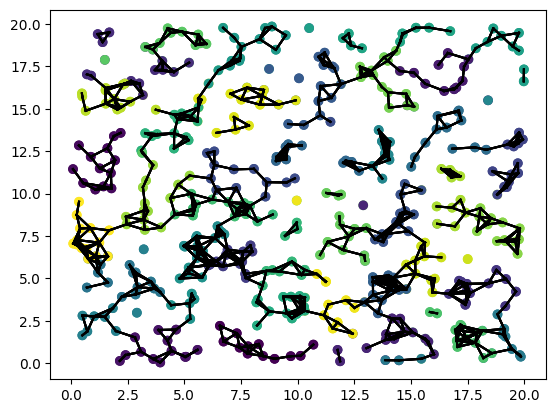

In [2]:
fig, ax = plt.subplots()
ax = plot_edges(xy, connect_matrix, ax)
ax = plot_nodes(xy, labels_list, ax)

group_matrix, labels_list = multiway_partitioning(xy, group_matrix, labels_list, connect_matrix)
group_matrix, labels_list = one_way_partitioing(xy, group_matrix, labels_list, connect_matrix)
ax = plot_edges(xy, connect_matrix, ax)
ax = plot_nodes(xy, labels_list, ax)


In [3]:
import plotly.graph_objects as go


def plot_nodes_plotly(xy, labels_list):
    """
    This function is used to plot the nodes using Plotly
    :param xy: the coordinates of the nodes: (num_nodes,2) matrix
    :param labels_list: the list of the labels of the nodes: (num_nodes) list
    :return: the figure of the nodes
    """
    # create the scatter plot of the nodes
    nodes = go.Scatter(x=xy[:, 0], y=xy[:, 1], mode='markers', marker=dict(color=labels_list))
    return nodes

def plot_edges_plotly(xy, connect_matrix):
    """
    This function is used to plot the edges using Plotly
    :param xy: the coordinates of the nodes: (num_nodes,2) matrix
    :param connect_matrix: the matrix of the connections between nodes: (num_nodes, num_nodes) matrix
    :return: the figure of the edges
    """
    # create the line segments for each edge
    edge_x = []
    edge_y = []
    for i in range(len(xy)):
        for j in range(len(xy)):
            if connect_matrix[i, j] > 0:
                edge_x.append(xy[i, 0])
                edge_x.append(xy[j, 0])
                edge_x.append(None)
                edge_y.append(xy[i, 1])
                edge_y.append(xy[j, 1])
                edge_y.append(None)

    # create the scatter plot of the edges
    edges = go.Scatter(x=edge_x, y=edge_y, mode='lines', line=dict(color='black', width=1))
    return edges

# create the figure
fig = go.Figure(data=[plot_nodes_plotly(xy, labels_list), plot_edges_plotly(xy, connect_matrix)])
fig.show()


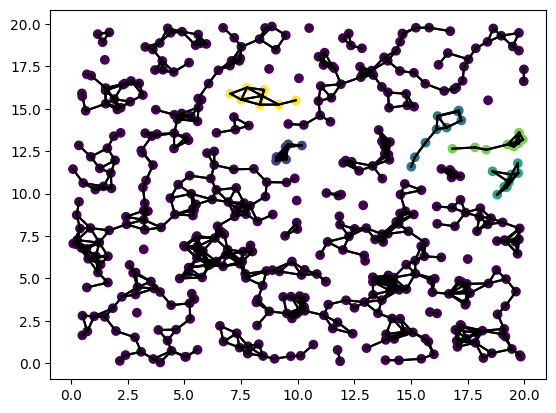

-1

In [7]:
clusters = []
visited = [False] * num_nodes
for node in range(num_nodes):
    if not visited[node]:
        cluster = []
        stack = [node]
        while stack:
            curr = stack.pop()
            if not visited[curr]:
                visited[curr] = True
                cluster.append(curr)
                for neighbor in range(num_nodes):
                    if connect_matrix[curr][neighbor]:
                        stack.append(neighbor)
        clusters.append(cluster)

clusters = [cluster for cluster in clusters if len(cluster) < num_nodes//max_clusters and len(cluster) > num_nodes//(max_clusters*2)] 

# intitilzie labels_list iwht -1 using numpy
labels_list = np.full(num_nodes, -1, dtype=int)
for i, cluster in enumerate(clusters):
    for node in cluster:
        labels_list[node] = i

fig, ax = plt.subplots()
ax = plot_nodes(xy, labels_list, ax)
ax = plot_edges(xy, connect_matrix, ax)
plt.show()
# count which cluster has the most nodes
max_cluster_size = max([len(cluster) for cluster in clusters])
max_cluster_size = max([len(cluster) for cluster in clusters])
i = max(list(labels_list), key=list(labels_list).count)
i

In [5]:
# # check if clusters have common points 
# for i, cluster in enumerate(clusters):
#     for j, cluster2 in enumerate(clusters):
#         if i != j:
#             for node in cluster:
#                 if node in cluster2:
#                     print("cluster", i, "and", j, "have common points")

In [1]:
from GraPart.showcase import single_network_showcase, bisection_showcase
bisection_showcase()

Number of clusters:  26
Upper bound:  13.0
size_max * num_clusters:  338.0
number of nodes:  300


/opt/miniconda3/lib/python3.9/site-packages/k_means_constrained/k_means_constrained_.py:644: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  k_means_constrained(


Number of clusters:  36
Upper bound:  9.0
size_max * num_clusters:  324.0
number of nodes:  285
Number of clusters:  37
Upper bound:  8.0
size_max * num_clusters:  296.0
number of nodes:  255
Number of clusters:  32
Upper bound:  8.0
size_max * num_clusters:  256.0
number of nodes:  215
Number of clusters:  34
Upper bound:  8.0
size_max * num_clusters:  272.0
number of nodes:  223
Number of clusters:  35
Upper bound:  8.0
size_max * num_clusters:  280.0
number of nodes:  223
Number of clusters:  26
Upper bound:  13.0
size_max * num_clusters:  338.0
number of nodes:  300
Number of clusters:  36
Upper bound:  9.0
size_max * num_clusters:  324.0
number of nodes:  285
Number of clusters:  37
Upper bound:  8.0
size_max * num_clusters:  296.0
number of nodes:  255
Number of clusters:  32
Upper bound:  8.0
size_max * num_clusters:  256.0
number of nodes:  215
Number of clusters:  34
Upper bound:  8.0
size_max * num_clusters:  272.0
number of nodes:  223
Number of clusters:  35
Upper bound:  8

KeyboardInterrupt: 